---
# **Data Science with Python : Exploratory Data Analysis using Python**


* Exploratory Data Analysis(EDA) is the method to get overview of dataset. It is the method of exploring the data and summarizing their main characterstic. 

* This step is very important especially when we arrive at modeling the data in order to apply Machine learning. 

* EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

* There is no one method or common methods in order to perform EDA, whereas in this documentation you can understand some common methods and plots that would be used in the EDA process.




---






---


# **Infromation About Dataset**
This is a dataset of breast cancer patient survival who went through surgery. This case study was conducted between 1958-1970. It has 4 attributes as follows.

[Download dataset-Kaggle](https://www.kaggle.com/krpiku/haberman.csv)

Columns

1. age - Age of Patients
2. year - Year on which they were operated on
3. nodes - number of nodes found
4. Status - 1/2
           1 - survived less than 5 years
           2 - survived more than 5 years


---



**Imported important libraries to work on dataset**

In [2]:
import numpy as np                                                 # Implements milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics

In [3]:
%matplotlib inline

# **DATA EXPLORATION**
* Data exploration is the first step towards data analysis. We visualize the data and try to understand it.
* We load the dataset and analyze the features and labels present inside the dataset.


In [4]:
#Loading the data into the dataframe
df=pd.read_csv('/content/haberman breast_cancer.csv')

**Reading first five values of dataset**

In [5]:
# To display first five rows of the dataset
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Reading last five values of dataset**

In [6]:
# To display last five rows of the dataset
df.tail()

,age,year,nodes,status
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [7]:
print(df.shape)             #gives the no. of rows and colomns exist in the dataset
print(df.columns)           #provides the name of the columns 

(305, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [8]:
df.nunique()

age       48
year      12
nodes     31
status     2
dtype: int64

In [9]:
# checking the datatypes
df.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [10]:
print(df['status'].value_counts())  #counts the rows which belongs to class 1 and 2 respectively

1    225
2     80
Name: status, dtype: int64


In [11]:
# isull() checks is there any null value present in column
#sum() prints the total null value present in any column
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [12]:
# Dropping duplicate value if there exist any
if df.duplicated().sum()>0:
  df.drop_duplicates(keep="first", inplace=True)
df.shape

(288, 4)

In [13]:
# Display concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     288 non-null    int64
 1   year    288 non-null    int64
 2   nodes   288 non-null    int64
 3   status  288 non-null    int64
dtypes: int64(4)
memory usage: 11.2 KB




---


**OBSERVATIONS CONCLUDED FROM INFO METHOD**
* Rows: 288
* Columns: 4
* Column Name: AGE, YEAR, NODES, STATUS
* The dataset is imabalanced
* STATUS 1 has 225(LIVED MORE THAN 5 YEARS)
* STATUS 2 has 81(LIVED LESS THAN 5 YEARS)


---




In [14]:
# Data Description
#describe method gives us the info such as
#count, mean, std, min, max etc
#these details help to give brief idea about the dataset that we are processing 
df.describe()

,age,year,nodes,status
count,288.000000,288.000000,288.000000,288.000000
mean,52.315972,62.923611,4.229167,1.270833
std,10.744782,3.268645,7.336814,0.445164
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,78.000000,69.000000,52.000000,2.000000




---


**OBSERVATIONS CONCLUDED FROM DESCRIBE METHOD**
* Average age of patients : 52 years
* Average year of operation : 1962
* Average no. of nodes found in patient:4
* RANGE OF COLUMNS :

1.   AGE(MIN:30, MAX:78)
2.   YEAR(MIN:1958, MAX:1969)
3.   NODES(MIN:0, MAX:52)


---




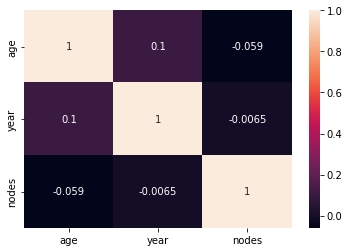

In [15]:
# Display the relation between the data means how much one variable (column) is influencing the other variable in the data.
features=df.drop('status', axis=1)
sns.heatmap(features.corr(),annot=True)

# **BIVARIATE ANALYSIS**

> Analysis of two variable is known as bivariate analysis. We can plot 2D scatter plots for plotting graph between two variables.



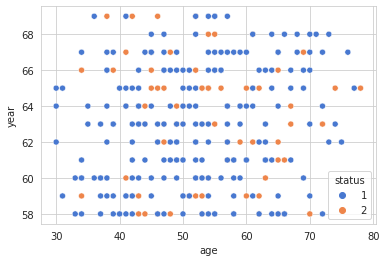

In [16]:
# 2-D Scatter Plot - provides visual image of the relationship between two variables.
sns.set_style("whitegrid");
#scatterplot between age and year
sns.scatterplot(data=df, x="age", y="year",hue='status',palette='muted')
plt.show()

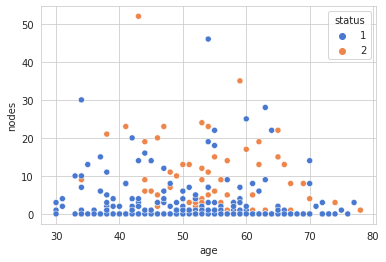

In [17]:
sns.set_style("whitegrid");

#scatterplot between age and nodes
sns.scatterplot(data=df, x="age", y="nodes",hue='status',palette='muted')
plt.show()

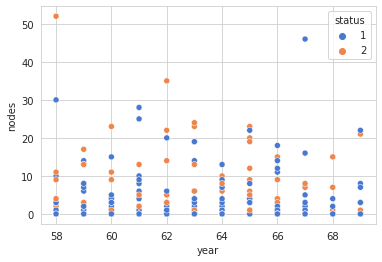

In [18]:
sns.set_style("whitegrid");

#scatterplot between year and nodes
sns.scatterplot(data=df, x="year", y="nodes",hue='status',palette='muted')
plt.show()



---


**OBSERVATIONS CONCLUDED FROM BIVARIATE ANALYSIS**
* Most of the patients have nodes number less than 5.

* Patients with age less than 40 have higher chances of survival and comparatively have less number of nodes.

* People with nodes more than 10 and above age 50 have less chances of survival.
* There are more no. of patients between age 40-65.


---



# **PAIRPLOT**


> Plot pairwise relationship in a dataset. It is also possible to show a subset of variables or plot different variables on the rows and columns.
> Instead of plotting each and every pair seperately, we can use pair plots. 








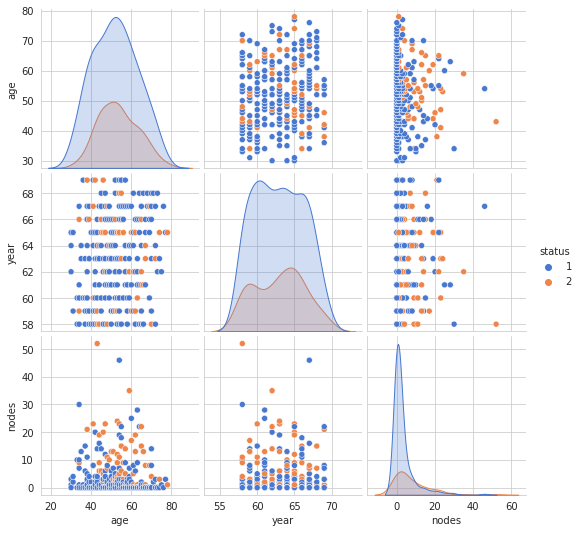

In [19]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", palette="muted");
plt.show()

---


**OBSERVATIONS CONCLUDED FROM PAIR PLOT**
* There is sharp decrease in people between number of nodes from 0-4. Most people have nodes near to zero.
* People with less number of nodes have more chance of survival and vice-versa.
* People above 5 nodes have survived almost half as compared to deaths.





---



# **BOX-PLOTS**

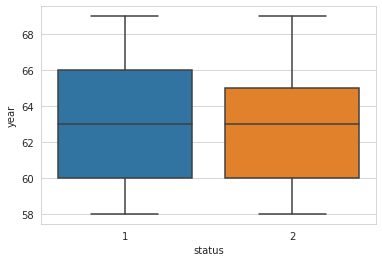

In [20]:
sns.boxplot(x='status',y='year', data=df)
plt.show()

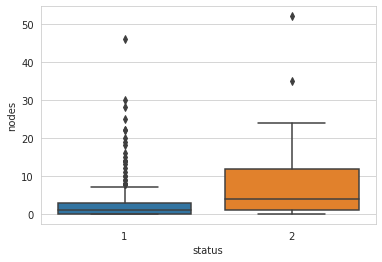

In [21]:
sns.boxplot(x='status',y='nodes', data=df)
plt.show()

---


**OBSERVATIONS CONCLUDED FROM BOX-PLOT**
* Lower age slighltly indicates high rate of survival.
* As year of operation is increasing, there are comparatively little high rate of success.
* There are few patients with number of nodes more than 10.
* Less the no. of nodes, higher the survival chance.





---



# **VIOLIN PLOTS**

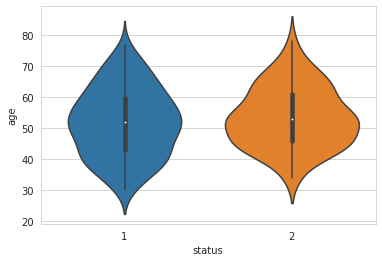

In [22]:
sns.violinplot(x="status", y="age", data=df, size=8)

plt.show()

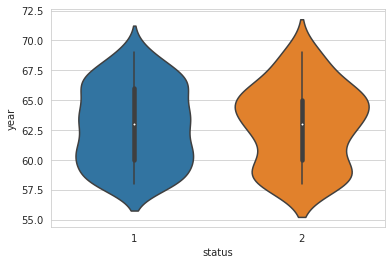

In [24]:
sns.violinplot(x="status", y="year", data=df, size=8)

plt.show()


**OBSERVATIONS CONCLUDED FROM VIOLIN-PLOT**
1. There are maximum number of people in the age group of 40-60
2.  Less the no. of nodes, higher the survival chance.
3. More deaths is seen in age group 40-50 as compared to survival rate.

# **FINAL CONCLUSION**
*  Higher number of nodes indiactes less chances of survival. But there are few people who survied with higher number of nodes and also there are people who died with almost no nodes. Hence, number of nodes alone cannot be strictly deciding factor.

* If you discover the nodes at early age and get operated on, more is the chances of survival.